In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving All_Pokemon.csv to All_Pokemon.csv


In [ ]:
df = pd.read_csv("All_Pokemon.csv")
df

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


# Count of Pokemon by their types

<ipython-input-14-ade90b2d676e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type 1', data=df, order=df['Type 1'].value_counts().index, palette='viridis')


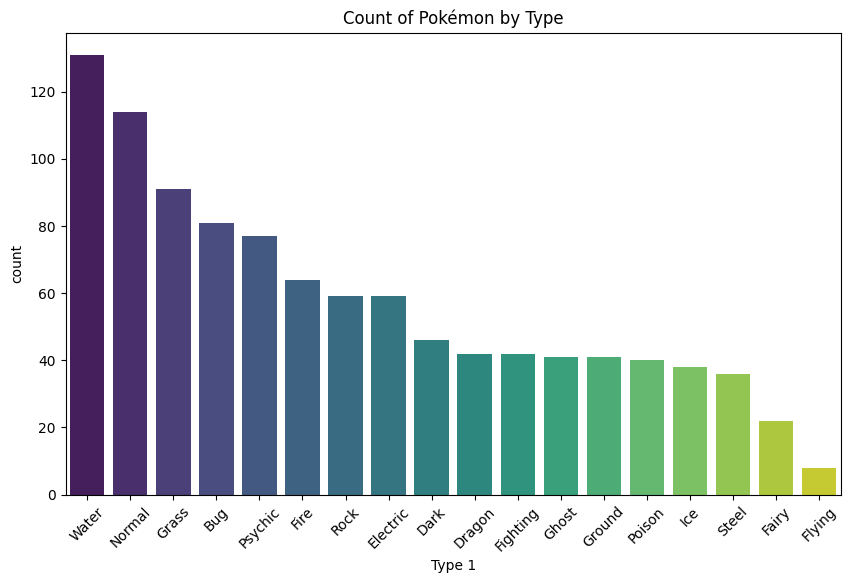

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type 1', data=df, order=df['Type 1'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Pokémon by Type')
plt.show()

# Attack VS Defense distribution by their types

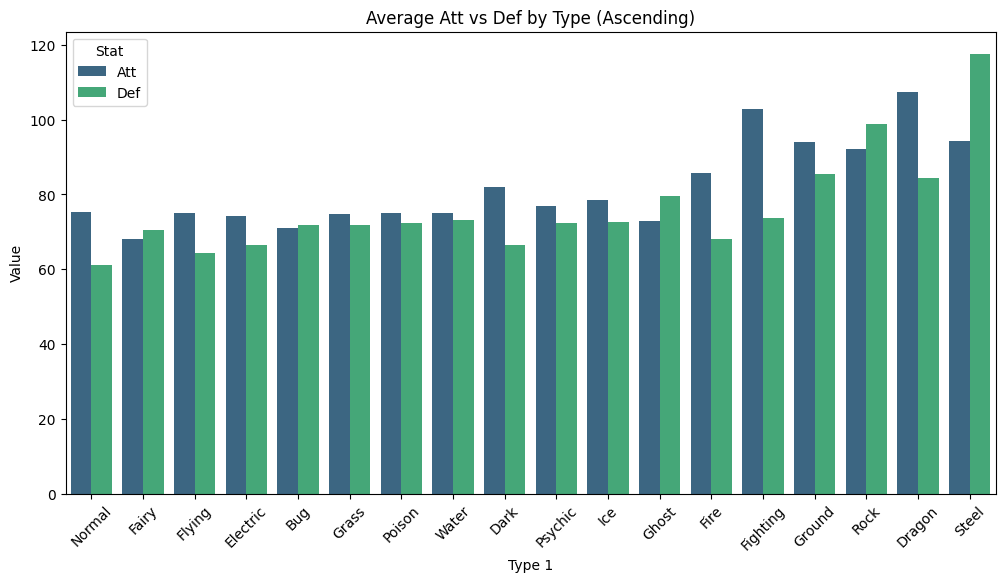

In [ ]:
type_stats = df.groupby('Type 1')[['Att', 'Def']].mean()
type_stats.rename(columns={'Attack': 'Att', 'Defense': 'Def'}, inplace=True)
type_stats['Avg_Stat'] = (type_stats['Att'] + type_stats['Def']) / 2


type_stats = type_stats.sort_values(by='Avg_Stat', ascending=True).reset_index()


melted_data = type_stats.melt(id_vars='Type 1', value_vars=['Att', 'Def'], var_name='Stat', value_name='Value')


palette = sns.color_palette("viridis", n_colors=len(melted_data['Stat'].unique()))


plt.figure(figsize=(12, 6))
sns.barplot(
    x='Type 1',
    y='Value',
    hue='Stat',
    data=melted_data,
    palette=palette
)


plt.title('Average Att vs Def by Type (Ascending)')
plt.xticks(rotation=45)
plt.legend(title='Stat')
plt.show()


# Legendary Pokemon Percentage in each types

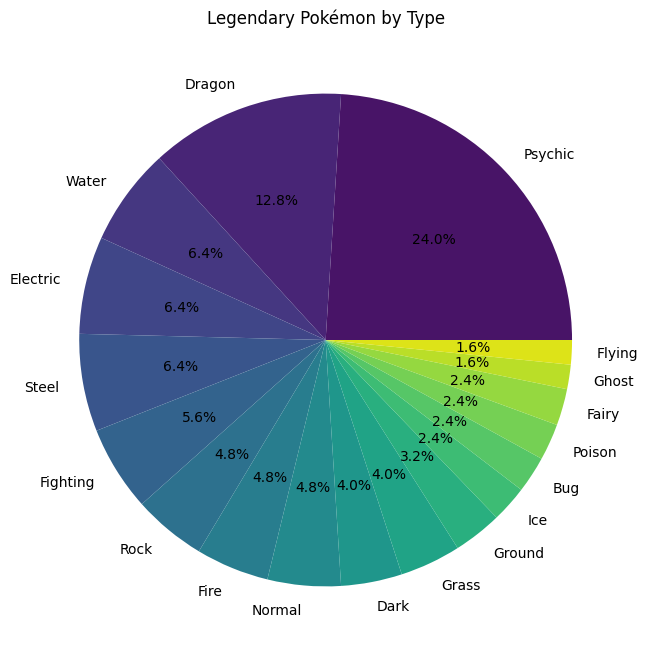

In [ ]:
legendary_count = df[df['Legendary'] == True]['Type 1'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    legendary_count,
    labels=legendary_count.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', n_colors=len(legendary_count))
)
plt.title('Legendary Pokémon by Type')
plt.show()


# Top 10 highest attack stat pokemon

<ipython-input-39-4bd0a4ef646e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Att', y='Name', data=top_attack, palette='coolwarm')


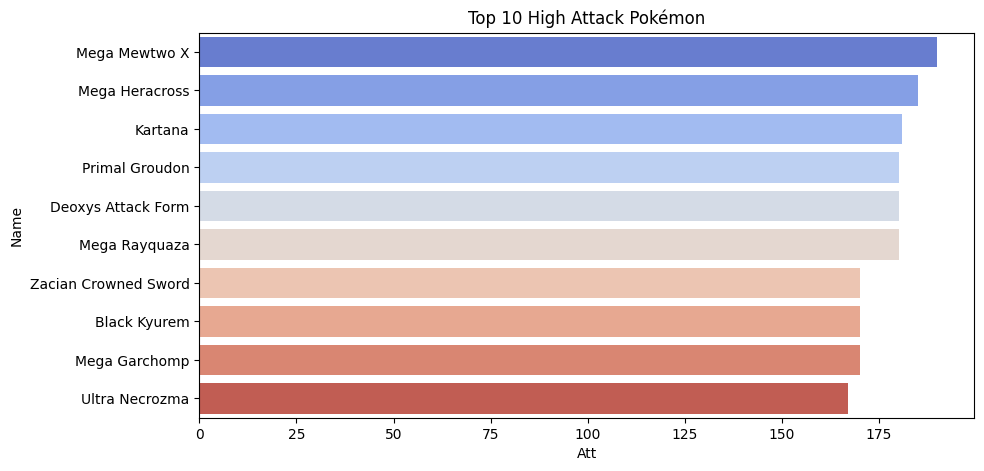

In [ ]:
top_attack = df[['Name', 'Att']].sort_values(by='Att', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='Att', y='Name', data=top_attack, palette='coolwarm')
plt.title('Top 10 High Attack Pokémon')
plt.show()


# Average Stats of Pokemon across generatons

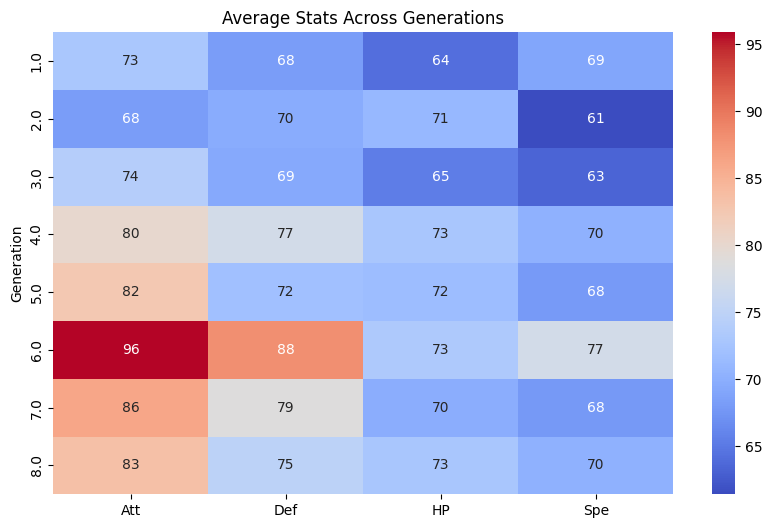

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(index='Generation', values=['Att', 'Def', 'HP', 'Spe'], aggfunc='mean'), cmap='coolwarm', annot=True)
plt.title('Average Stats Across Generations')
plt.show()